<a href="https://colab.research.google.com/github/its-safi/Optimization_NeuralNetworks/blob/main/MNIST_OPTIMIZATIONII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import os

import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input

In [39]:
mnist = tf.keras.datasets.mnist

In [75]:
tf.random.set_seed(7)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


As we can see, there is little to no imbalance in the data sets


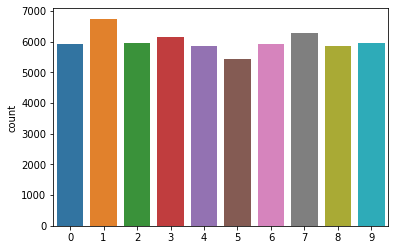

In [41]:
#Checking for Imbalanced Data
g = sns.countplot(y_train)
print('As we can see, there is little to no imbalance in the data sets')

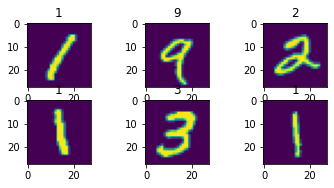

In [76]:
#Visualizing some of the images for better understanding
for i in range(3, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i])
    plt.title(y_train[i]);

In [43]:
#Reshaping the data before running the model 

x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))

xshape = x_train.shape[1:4]

In [5]:
model = Sequential()

#First Convolution Layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

#Second Convlution Layer
model.add(Conv2D(128,(2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 1))


model.add(Flatten())

#Adding the Dense Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                   metrics= ['accuracy'])

In [6]:
history1 = model.fit(x_train,y_train,epochs=35,validation_split=0.2,batch_size=2000)

Epoch 1/35
24/24 [==============================] - 17s 165ms/step - loss: 1.5781 - accuracy: 0.6800 - val_loss: 0.2015 - val_accuracy: 0.9417
Epoch 2/35
24/24 [==============================] - 4s 157ms/step - loss: 0.1428 - accuracy: 0.9577 - val_loss: 0.0886 - val_accuracy: 0.9743
Epoch 3/35
24/24 [==============================] - 4s 156ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.0613 - val_accuracy: 0.9831
Epoch 4/35
24/24 [==============================] - 4s 165ms/step - loss: 0.0513 - accuracy: 0.9842 - val_loss: 0.0504 - val_accuracy: 0.9857
Epoch 5/35
24/24 [==============================] - 4s 157ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 6/35
24/24 [==============================] - 4s 158ms/step - loss: 0.0320 - accuracy: 0.9907 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 7/35
24/24 [==============================] - 4s 159ms/step - loss: 0.0268 - accuracy: 0.9920 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch

In [44]:
#VALIDATING WITH TEST DATA 

print('This model predicts '+str(model.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9918
This model predicts 99.18000102043152% of the test data correctly


**We have acheived a test data accuracy of 99.2%** 
</br>
NOTE : This has been done with a train-validation split of 0.2


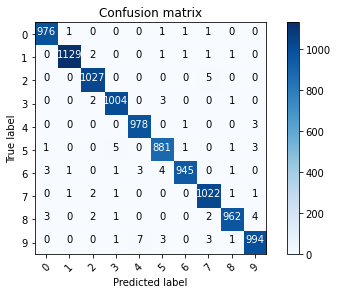

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**Some key Highlights from the Confusion Matrix**

1.   Model has wrongly predicted the digit "7" five times, for the true image of "2" 
2.   "4" and "9" seem to have a degree of error in predicting. 
3. "5" and "3" also have a degree of error. 
4. "8" and "0" also have a degree of error. 

Come to think of it, these digits, can carry a high degree of error, if they are not written clearly. **Lets Visualize some of these errors**





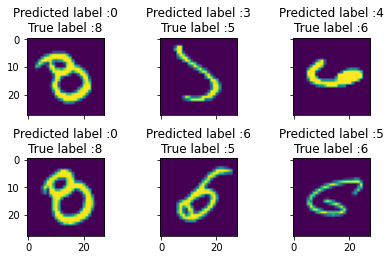

In [63]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - y_test != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = y_test[errors]
X_val_errors = x_test[errors]


def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True , figsize=(5.5, 3.5) , constrained_layout=True )

    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))

            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))


# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)



In [71]:
# Retraining with entire dataset using same model
from tensorflow.keras.models import clone_model

model2 = clone_model(model)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',
                   metrics= ['accuracy'])


history2 = model2.fit(x_train,y_train,epochs=50,validation_split=0.0,batch_size=2000)


Epoch 1/50
30/30 [==============================] - 5s 147ms/step - loss: 1.3637 - accuracy: 0.7052
Epoch 2/50
30/30 [==============================] - 4s 146ms/step - loss: 0.1151 - accuracy: 0.9651
Epoch 3/50
30/30 [==============================] - 4s 148ms/step - loss: 0.0594 - accuracy: 0.9821
Epoch 4/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0431 - accuracy: 0.9876
Epoch 5/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0332 - accuracy: 0.9901
Epoch 6/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 7/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 8/50
30/30 [==============================] - 4s 147ms/step - loss: 0.0186 - accuracy: 0.9947
Epoch 9/50
30/30 [==============================] - 4s 146ms/step - loss: 0.0165 - accuracy: 0.9954
Epoch 10/50
30/30 [==============================] - 4s 147ms/step - loss: 0.0133 - accuracy: 0.9965

In [72]:
print('This model predicts '+str(model2.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 2s 5ms/step - loss: 0.0395 - accuracy: 0.9910
This model predicts 99.09999966621399% of the test data correctly


**After removing the Validation data set we expect the model to OVERFIT the data, therefore resulting in lower test accuracy. However, this is not the case for this data set, as we see only a slight decrease in the test accuracy**

1. This could be explained because the model is trained on more images, and offsets the opossible overfitting. 


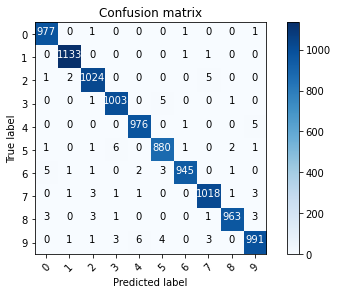

In [73]:
#Plotting the Confusion Matrix

# Predict the values from the validation dataset
Y_pred = model2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 


# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

**As expected, we see nearly Similar results**

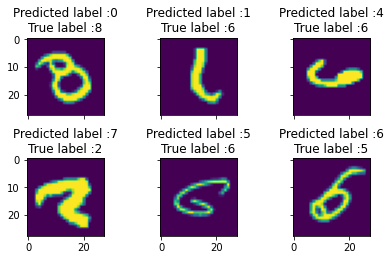

In [74]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - y_test != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = y_test[errors]
X_val_errors = x_test[errors]

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))


# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)